# Índice de contenidos
1. Antes de empezar:

2. Reto 1 - Importar y describir el conjunto de datos

    2.0.0.1 Explore el conjunto de datos con técnicas matemáticas y de visualización. ¿Qué encuentra?

3. Reto 2 - Limpieza y transformación de datos

4. Reto 3 - Preprocesamiento de datos

    4.0.0.1 Utilizaremos el StandardScaler de sklearn.preprocessing y escalaremos nuestros datos. Lea más sobre StandardScaler aquí.

5. Reto 4 - Agrupación de datos con K-Means

6. Reto 5 - Agrupación de datos con DBSCAN

7. Reto 6 - Comparar K-Means con DBSCAN

8. Reto adicional 2 - Cambiar el número de clusters de K-Means

9. Bonus Challenge 3 - Cambiar DBSCAN eps y min_samples

# Antes de empezar:
- Lee el archivo README.md
- Comenta todo lo que puedas y utiliza los recursos del archivo README.md
- ¡Feliz aprendizaje!

In [89]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Desafío 1 - Importar y describir el conjunto de datos

En este laboratorio, utilizaremos un conjunto de datos que contiene información sobre las preferencias de los clientes. Analizaremos cuánto gasta cada cliente en un año en cada subcategoría de la tienda de comestibles e intentaremos encontrar similitudes mediante la agrupación.

El origen del conjunto de datos es [aquí](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# loading the data:
df = pd.read_csv('../data/Wholesale customers data.csv')

In [91]:
df.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


#### Explora el conjunto de datos con técnicas matemáticas y de visualización. ¿Qué encuentras?

Lista de comprobación:

* ¿Qué significa cada columna?
* ¿Hay datos categóricos que convertir?
* ¿Hay que eliminar datos que faltan?
* Colinealidad de columnas: ¿hay correlaciones altas?
* Estadísticas descriptivas: ¿hay que eliminar algún valor atípico?
* Distribución de los datos por columnas: ¿está sesgada la distribución?
* Etc.

Información adicional: Hace más de un siglo, un economista italiano llamado Vilfredo Pareto descubrió que aproximadamente el 20% de los clientes representan el 80% de las ventas minoristas típicas. Esto se denomina [principio de Pareto](https://en.wikipedia.org/wiki/Pareto_principle). Compruebe si este conjunto de datos presenta esta característica.

In [92]:
df.columns


Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [94]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [95]:
df.corr() # Grocery y Detergents_Paper alta correlación

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


<Axes: >

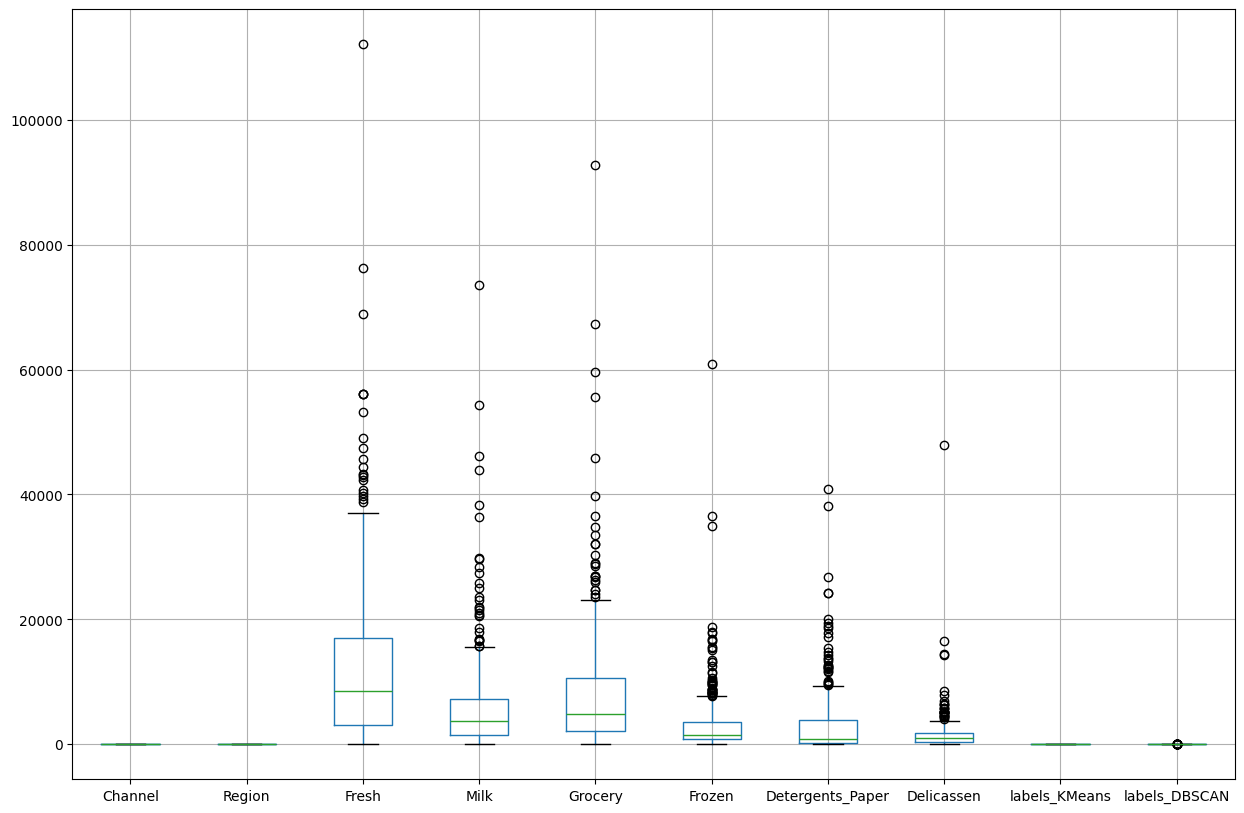

In [120]:
# Ver outliers

df.boxplot(figsize=(15, 10))

#Hay outliers en 

In [97]:
df.Channel.value_counts()

Channel
1    298
2    142
Name: count, dtype: int64

In [98]:
df.Region.value_counts()

Region
3    316
1     77
2     47
Name: count, dtype: int64

**Tus observaciones aquí**

+ Frozen, Grocery, Milk y Detergents Paper son variables continuas
+ Chanel + Region son Categoricas
+ 
+ 



# Reto 2 - Limpieza y transformación de datos

Si tu conclusión del reto anterior es que los datos necesitan limpieza/transformación, hazlo en las celdas de abajo. Sin embargo, si su conclusión es que los datos no necesitan ser limpiados o transformados, no dudes en saltarte este reto. Si optas por esta última opción, explica los motivos.

In [99]:
print(df.isnull().sum())

has_duplicates = df.duplicated().any()
print("\nDuplicados:",has_duplicates)


Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

Duplicados: False


**Tus observaciones aquí**

+ Parece que NO hay duplicados
+ 
+ 

# Reto 3 - Preprocesamiento de datos

Uno de los problemas del conjunto de datos es que los rangos de valores son notablemente diferentes en las distintas categorías (por ejemplo, `Fresh` y `Grocery` en comparación con `Detergents_Paper` y `Delicassen`). Si hiciste esta observación en el primer reto, ¡has hecho un gran trabajo! Esto significa que no sólo has completado las preguntas de bonificación en el anterior laboratorio de Aprendizaje Supervisado, sino que también has investigado en profundidad sobre [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). ¡Sigue trabajando así de bien!

Diversos rangos de valores en diferentes características podrían causar problemas en nuestra agrupación. La forma de reducir el problema es mediante el escalado de características. Volveremos a utilizar esta técnica con este conjunto de datos.

#### Utilizaremos el `StandardScaler` de `sklearn.preprocessing` y escalaremos nuestros datos. Lee más sobre `StandardScaler` [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).


StandardScaler es una herramienta esencial en el preprocesamiento de datos para machine learning, ya que ayuda a mejorar el rendimiento de los modelos al garantizar que todas las características contribuyan de manera equitativa al aprendizaje.


*Después de escalar tus datos, asigna los datos transformados a una nueva variable `customers_scale`.

In [100]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Modelo StandardScaler
scaler = StandardScaler()

# Fit
customers_scale = scaler.fit_transform(df)

print("Datos originales:")
print(df)
print("\nDatos escalados:")
print(customers_scale)

Datos originales:
     Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  
0          1338  
1          1776  
2          7844  
3          1788  
4          5185

# Reto 4 - Agrupación de datos con K-Means

Ahora vamos a agrupar los datos con K-Means primero. Inicia el modelo K-Means, luego ajusta tus datos escalados. En los datos devueltos por el método `.fit`, hay un atributo llamado `labels_` que es el número de cluster asignado a cada registro de datos. Lo que puede hacer es asignar estas etiquetas de nuevo a `customers` en una nueva columna llamada `customers['labels']`. Entonces verá los resultados de cluster de los datos originales.

In [101]:
from sklearn.cluster import KMeans

# Modelo K-Means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit
kmeans.fit(customers_scale)

# kmeans etiquetas de cluster
labels = kmeans.labels_

# Agregar labels_KMeans al DataFrame 
df['labels_KMeans'] = labels

# Comprobar DataFrame
print("DataFrame con etiquetas de cluster:")
print(df)

DataFrame con etiquetas de cluster:
     Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  labels_KMeans  
0          1338              0  
1          1776      

Cuenta los valores en `labels`.

In [104]:
df.labels_KMeans.value_counts()


labels_KMeans
1    297
0    130
2     13
Name: count, dtype: int64

# Reto 5 - Clustering de datos con DBSCAN

Ahora vamos a agrupar los datos utilizando DBSCAN. Utiliza `DBSCAN(eps=0.5)` para iniciar el modelo y, a continuación, ajusta los datos escalados. En los datos devueltos por el método `.fit`, asigna las `labels_` de nuevo a `customers['labels_DBSCAN']`. Ahora tus datos originales tienen dos etiquetas, una de K-Means y la otra de DBSCAN.

In [105]:
from sklearn.cluster import DBSCAN

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5)
dbscan.fit(customers_scale)
df['labels_DBSCAN'] = dbscan.labels_

# Comprobar DataFrame
print("DataFrame with K-Means and DBSCAN labels:")
print(df)

DataFrame with K-Means and DBSCAN labels:
     Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  labels_KMeans  labels_DBSCAN  
0          1338              0   

Cuenta los valores en `labels_DBSCAN`.

In [106]:
df.labels_DBSCAN.value_counts()

# El hecho de que la mayoría de los puntos estén etiquetados como -1 (ruido) indica que DBSCAN no encontró suficientes 
# puntos cercanos para formar clusters significativos en tu conjunto de datos. 
# Esto puede suceder si los parámetros de DBSCAN (como eps) no están bien ajustados para la densidad de tus datos.


labels_DBSCAN
-1    255
 1    130
 5     22
 4      7
 6      6
 0      5
 3      5
 2      5
 7      5
Name: count, dtype: int64

# Reto 6 - Comparar K-Means con DBSCAN

Ahora queremos comparar visualmente cómo K-Means y DBSCAN han agrupado nuestros datos. Crearemos gráficos de dispersión para varias columnas. Para cada uno de los siguientes pares de columnas, traza un gráfico de dispersión utilizando `labels` y otro utilizando `labels_DBSCAN`. Ponlos uno al lado del otro para compararlos. ¿Qué algoritmo de agrupación tiene más sentido?

Columnas a visualizar:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualice `Detergentes_Papel` como X y `Leche` como Y mediante `labels` y `labels_DBSCAN` respectivamente

Visualice `Grocery` como X y `Fresh` como Y mediante `labels` y `labels_DBSCAN` respectivamente

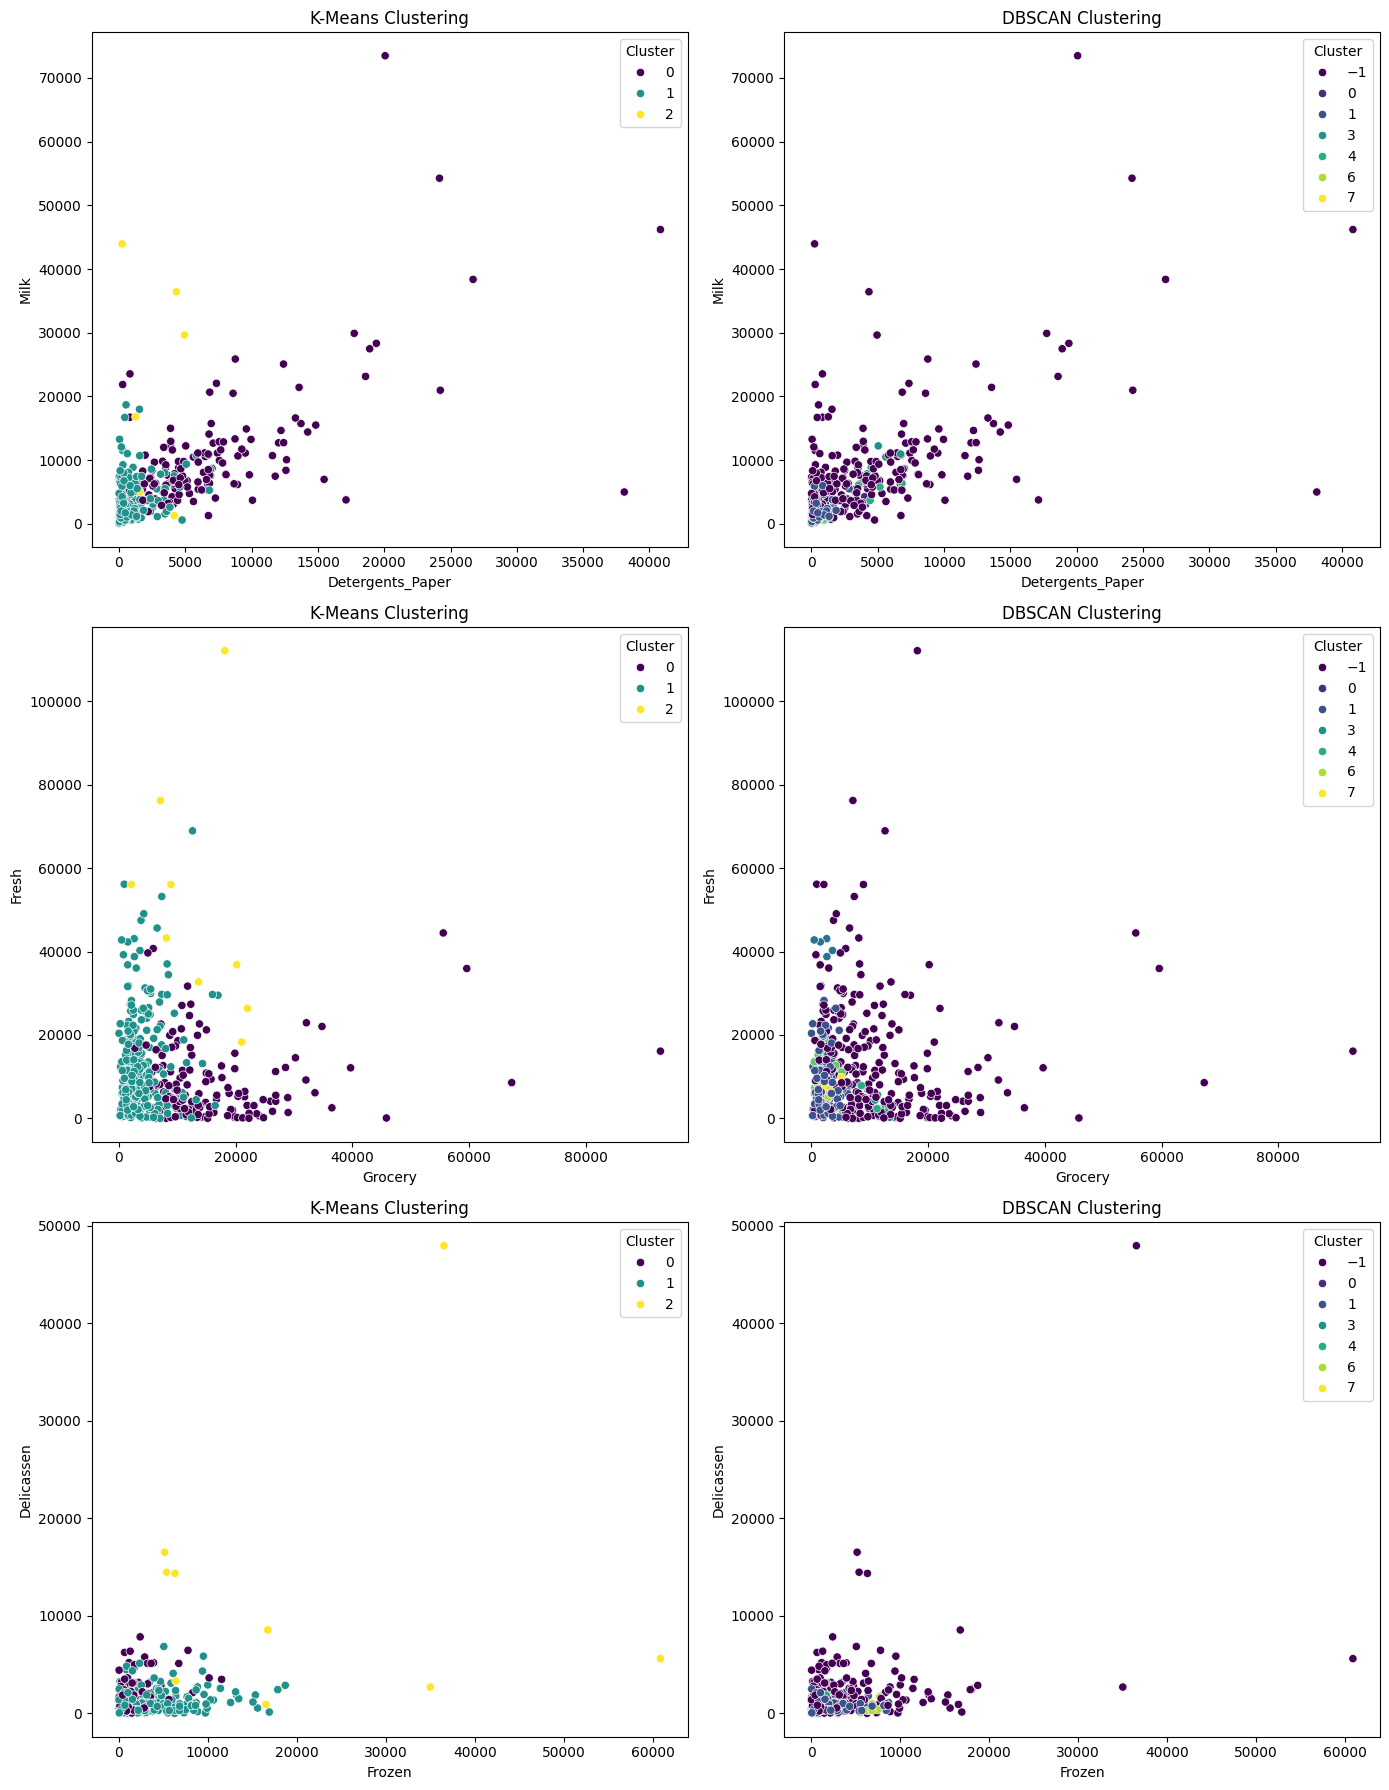

In [108]:
# Escalar datos
scaler = StandardScaler()
customers_scale = scaler.fit_transform(customers)

# K-Means Clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(customers_scale)
customers['labels_KMeans'] = kmeans.labels_

# DBSCAN Clusters
dbscan = DBSCAN(eps=0.5)
dbscan.fit(customers_scale)
customers['labels_DBSCAN'] = dbscan.labels_


column_pairs = [
    ('Detergents_Paper', 'Milk'),
    ('Grocery', 'Fresh'),
    ('Frozen', 'Delicassen')
]

#PLTO
def plot(x, y, hue, title, ax):
    sns.scatterplot(x=x, 
                    y=y,
                    hue=hue,
                    palette='viridis',
                    ax=ax)
    ax.set_title(title)
    ax.set_xlabel(x.name)
    ax.set_ylabel(y.name)
    ax.legend(title='Cluster')


fig, axes = plt.subplots(len(column_pairs), 2, figsize=(14, 6 * len(column_pairs)))


for i, (x_col, y_col) in enumerate(column_pairs):
    # K-Means
    plot(customers[x_col], customers[y_col], customers['labels_KMeans'], 
         'K-Means Clustering', axes[i, 0])
    
    # DBSCAN
    plot(customers[x_col], customers[y_col], customers['labels_DBSCAN'], 
         'DBSCAN Clustering', axes[i, 1])


plt.tight_layout()
plt.show()


Visualice `Frozen` como X y `Delicassen` como Y mediante `labels` y `labels_DBSCAN` respectivamente

Vamos a utilizar un groupby para ver cómo la media difiere entre los grupos. Agrupamos `customers` por `labels` y `labels_DBSCAN` respectivamente y calculamos las medias de todas las columnas.

In [109]:
# Group by K-Means 
kmeans_means = customers.groupby('labels_KMeans').mean()
kmeans_means

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_DBSCAN
labels_KMeans,,,,,,,,,
0,1.986014,2.601399,8773.657343,10704.230769,16258.216783,1701.447552,7196.118881,1686.860140,-0.580420
1,1.000000,2.508711,12390.724739,3038.142857,3659.655052,3140.623693,763.780488,1090.031359,0.703833
2,1.100000,2.700000,46936.000000,14770.500000,12331.600000,20698.400000,1960.700000,11688.300000,-1.000000


In [110]:
# Group by DBSCAN 
dbscan_means = customers.groupby('labels_DBSCAN').mean()
dbscan_means


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_KMeans
labels_DBSCAN,,,,,,,,,
-1,1.490196,2.45098,13729.564706,8359.886275,11484.364706,3795.003922,4356.800000,2080.470588,0.545098
0,2.000000,3.00000,11401.000000,3536.200000,6729.000000,720.200000,3561.000000,258.200000,0.000000
1,1.000000,3.00000,9128.823077,1862.438462,2423.530769,2131.430769,496.576923,741.946154,1.000000
2,1.000000,3.00000,41446.600000,1421.200000,2167.600000,1276.400000,416.200000,784.800000,1.000000
3,2.000000,3.00000,2357.200000,10224.800000,11862.800000,609.600000,5780.000000,572.800000,0.000000
4,2.000000,3.00000,3068.142857,6095.857143,10355.000000,994.000000,4675.571429,1826.428571,0.000000
5,1.000000,1.00000,9837.863636,1751.863636,2161.681818,1513.181818,333.954545,669.045455,1.000000
6,1.000000,1.00000,6823.000000,1943.000000,2372.666667,6780.333333,386.500000,613.666667,1.000000
7,1.000000,2.00000,7494.600000,1537.600000,3383.000000,2575.400000,227.400000,941.000000,1.000000


¿Qué algoritmo funciona mejor?

**Tus observaciones aquí**

El rendimiento de los algoritmos:

*K-means: forma 3 clusters (0,1,2) y en las gráficas se observan bien y están separados unos de otros

*DBSCAN: forma un cluster(-1), todos los valores son NaN , los considera outliers. No encontró clusters bien definidos 



# Bonus Challenge 2 - Cambiar el número de clusters de K-Means

Como hemos mencionado antes, no tenemos que preocuparnos por el número de clusters con DBSCAN porque lo decide automáticamente en función de los parámetros que le enviemos. Pero con K-Means, tenemos que suministrar el parámetro `n_clusters` (si no se suministra `n_clusters`, el algoritmo utilizará `8` por defecto). Debe saber que el número óptimo de clusters varía en función del conjunto de datos. K-Means puede funcionar mal si se utiliza un número incorrecto de clusters.

En el aprendizaje automático avanzado, los científicos de datos prueban diferentes números de clusters y evalúan los resultados con medidas estadísticas (leer [aquí](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). Hoy no vamos a utilizar medidas estadísticas, sino nuestros ojos. En las celdas de abajo, experimenta con distintos números de conglomerados y visualízalos con gráficos de dispersión. ¿Qué número de clusters parece funcionar mejor para K-Means?

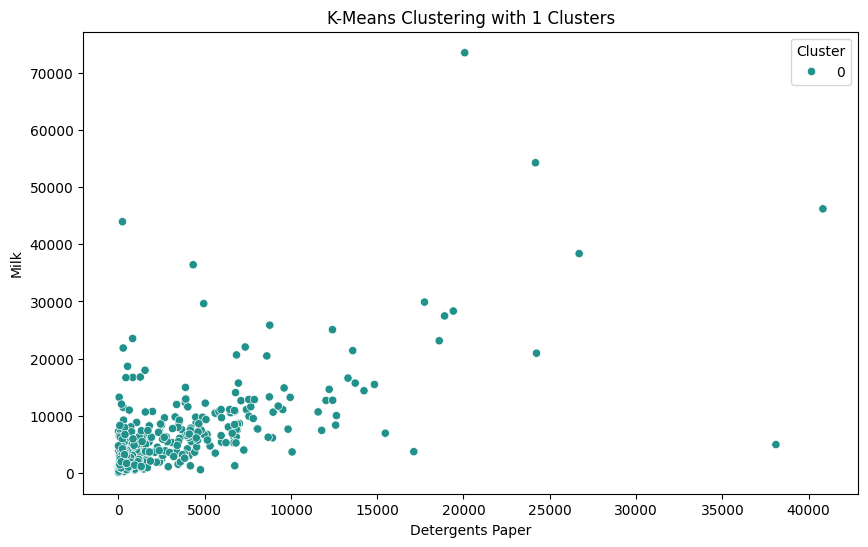

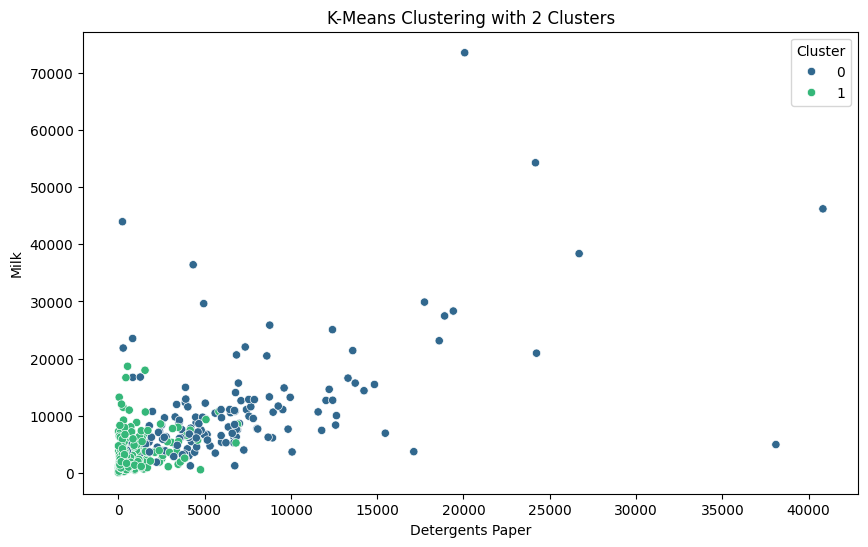

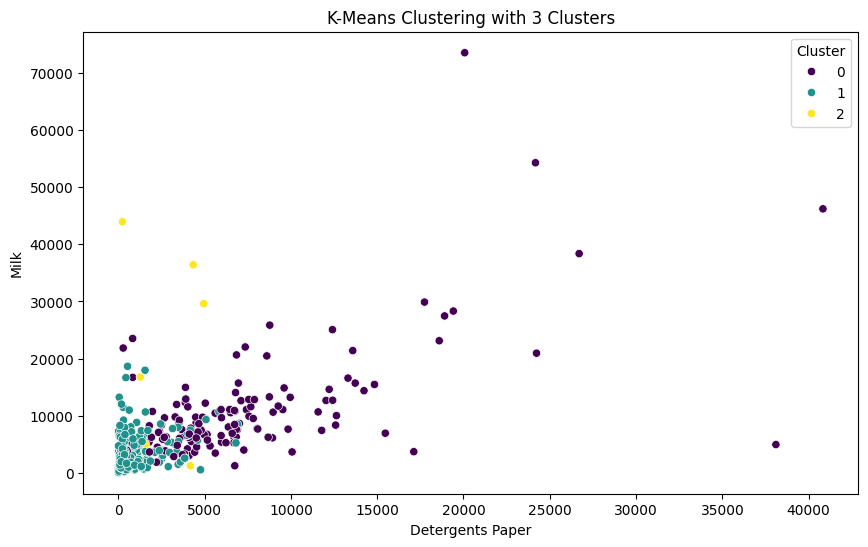

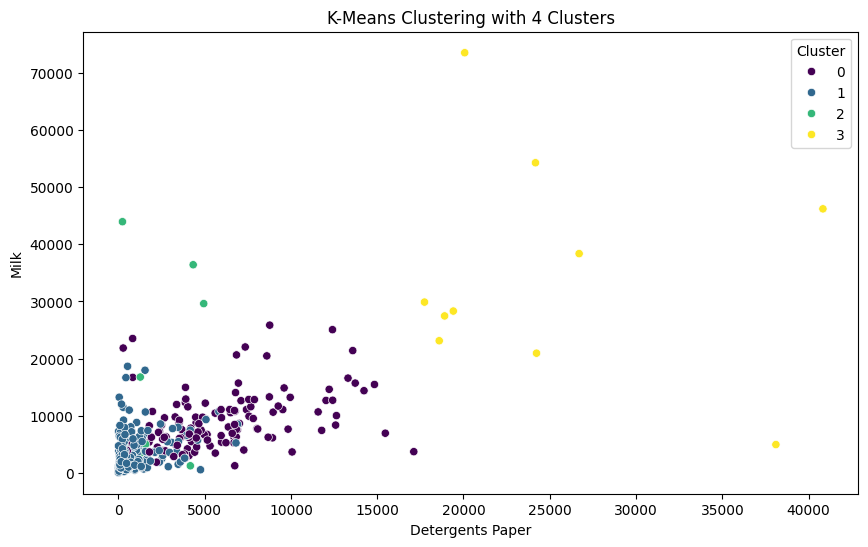

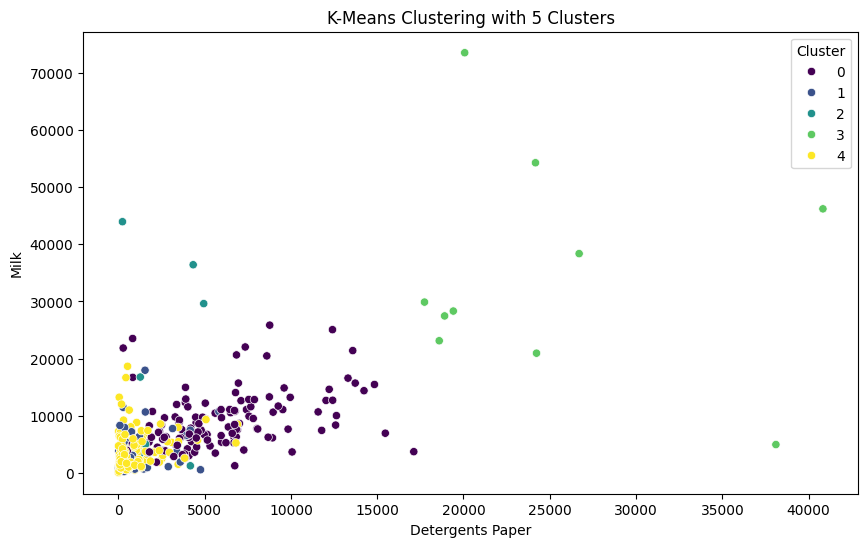

In [111]:

def plot_kmeans(n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    customers['labels_KMeans'] = kmeans.fit_predict(customers_scale)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=customers['Detergents_Paper'], 
                    y=customers['Milk'], 
                    hue=customers['labels_KMeans'], 
                    palette='viridis', 
                    legend='full')
    plt.title(f'K-Means Clustering with {n_clusters} Clusters')
    plt.xlabel('Detergents Paper')
    plt.ylabel('Milk')
    plt.legend(title='Cluster')
    plt.show()

for n in range(1, 6):  
    plot_kmeans(n)


**Tus observaciones aquí**

* Viendo los gráficos del k-means parece que 3 y 4 clusters son los que mejor separados vemos.

Otras formas de comprobarlo:

El método del codo es una técnica comúnmente utilizada para determinar el número óptimo de clusters. Funciona de la siguiente manera:
Calcular la Inercia: Para diferentes valores de n_clusters, calcula la inercia (suma de las distancias cuadradas de cada punto al centroide de su cluster).
Graficar la Inercia: Luego, grafica la inercia en función del número de clusters.
Buscar el "Codo": Observa la gráfica y busca el punto donde la inercia comienza a disminuir a un ritmo más lento (el "codo"). Este punto sugiere un número adecuado de clusters.


Silhouette Score
El Silhouette Score es otra métrica que puedes utilizar para evaluar la calidad de los clusters. Este score mide cuán similares son los puntos dentro de un cluster en comparación con los puntos de otros clusters. Un valor más alto indica que los puntos están bien agrupados.

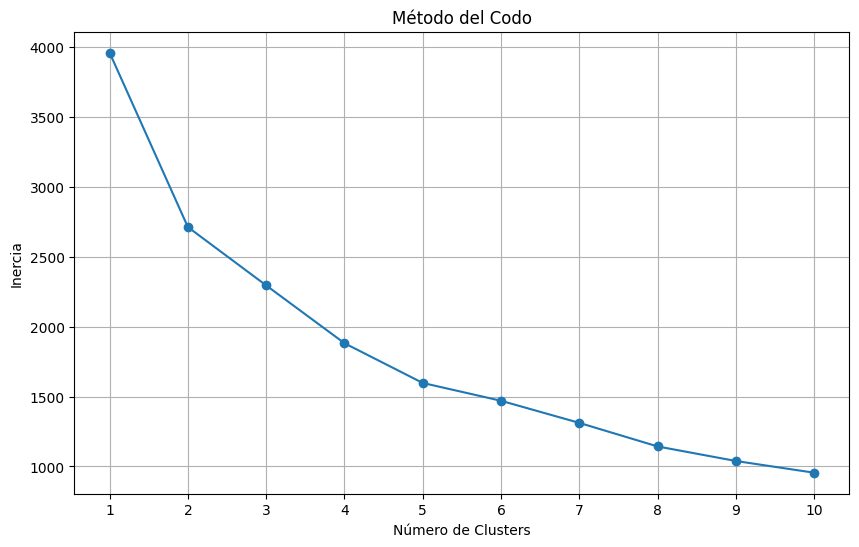

In [112]:
# Método del Codo
inertia = []
for n in range(1, 11):  # Probar de 1 a 10 clusters
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(customers_scale)
    inertia.append(kmeans.inertia_)

# Graficar la inercia
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

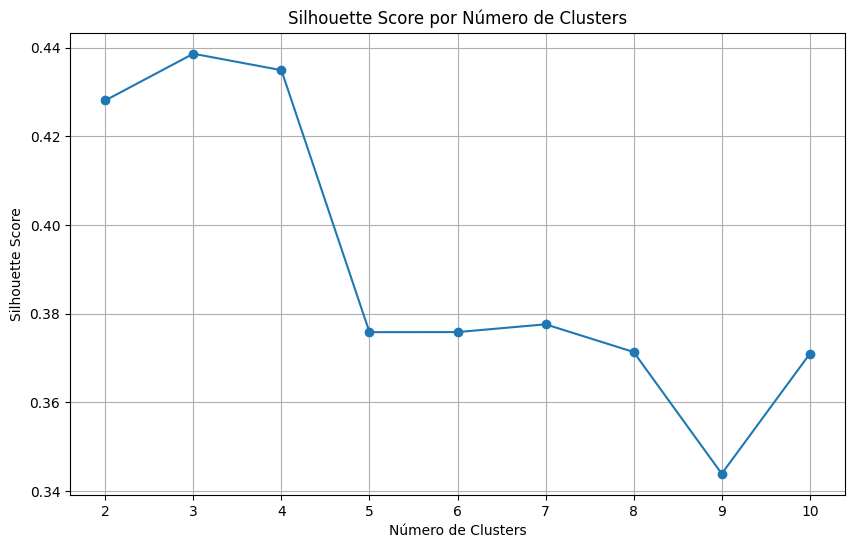

In [113]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for n in range(2, 11):  # Comenzar desde 2 porque el Silhouette Score no se puede calcular para 1 cluster
    kmeans = KMeans(n_clusters=n, random_state=42)
    labels = kmeans.fit_predict(customers_scale)
    silhouette_scores.append(silhouette_score(customers_scale, labels))

# Graficar el Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score por Número de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid()
plt.show()

# Bonus Challenge 3 - Cambiar `eps` y `min_samples` de DBSCAN

Experimenta cambiando los parámetros `eps` y `min_samples` de DBSCAN. Mira cómo difieren los resultados con la visualización de gráficos de dispersión.

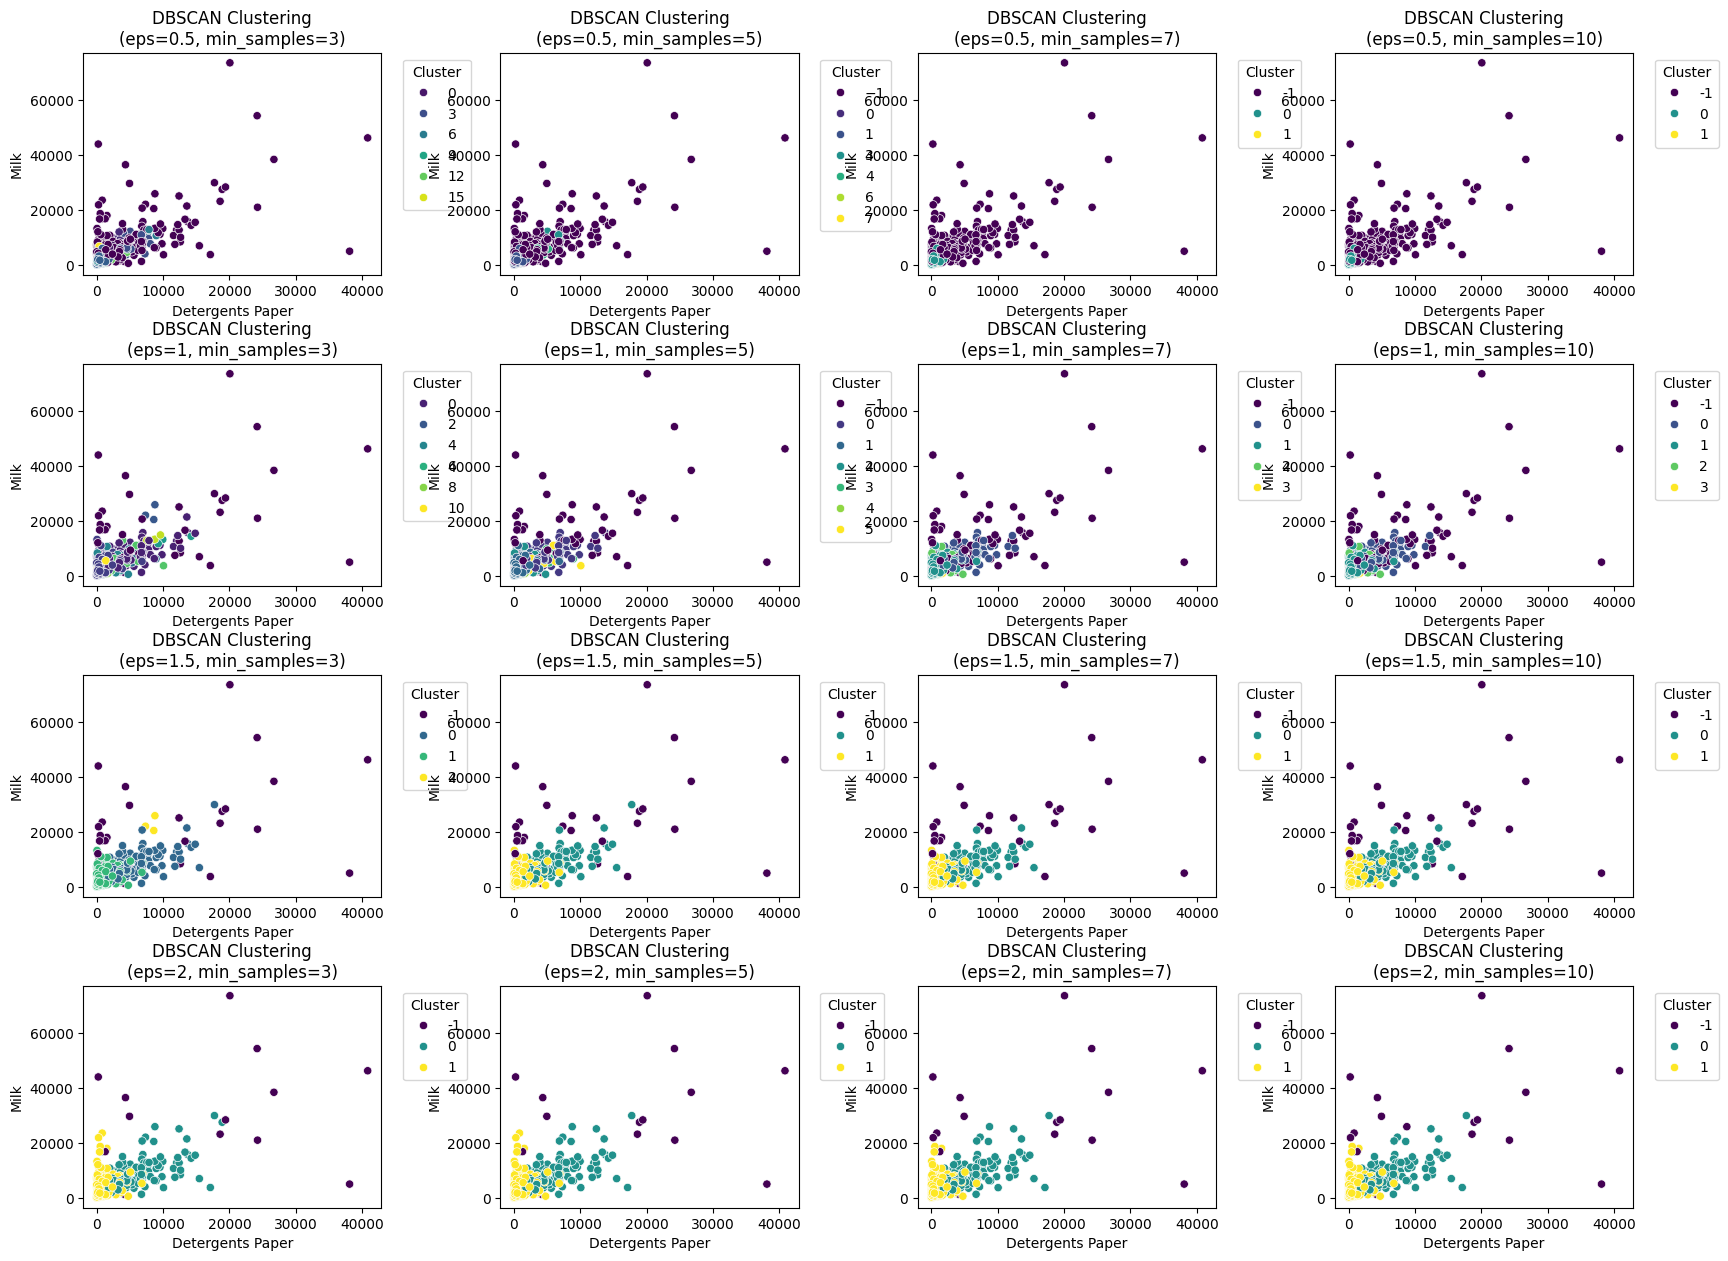

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

customers = pd.read_csv('../data/Wholesale customers data.csv')

# Escalado
scaler = StandardScaler()
customers_scale = scaler.fit_transform(customers)

# DBSCAN
def plot_dbscan(ax, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    customers['labels_DBSCAN'] = dbscan.fit_predict(customers_scale)

    sns.scatterplot(x=customers['Detergents_Paper'], 
                    y=customers['Milk'], 
                    hue=customers['labels_DBSCAN'], 
                    palette='viridis', 
                    ax=ax)
    ax.set_title(f'DBSCAN Clustering\n(eps={eps}, min_samples={min_samples})')
    ax.set_xlabel('Detergents Paper')
    ax.set_ylabel('Milk')
    ax.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

# Diferenes valores
eps_values = [0.5, 1, 1.5, 2]
min_samples_values = [3, 5, 7, 10]

fig, axes = plt.subplots(len(eps_values), len(min_samples_values), figsize=(20, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)


for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        plot_dbscan(axes[i, j], eps, min_samples)

plt.show()

**Tus observaciones aquí**

    + El DBscan ajustado parece más claro cuando eps=1.5 aunque definitivamente eps=2 se ven los grupos bien diferenciados.
    
Aunque también podemos sacar conclusiones apartir de Este código calcula el Silhouette Score para todas las combinaciones de eps y min_samples, ordena los resultados por el puntaje y muestra los 5 mejores.

In [115]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for eps in [0.5, 1, 1.5, 2]:
    for min_samples in [3, 5, 7, 10]:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(customers_scale)
        score = silhouette_score(customers_scale, labels)
        silhouette_scores.append((eps, min_samples, score))

# Ordenar los resultados por Silhouette Score
silhouette_scores.sort(key=lambda x: x[2], reverse=True)

# Imprimir los mejores resultados
print("Mejores valores de eps y min_samples según Silhouette Score:")
for eps, min_samples, score in silhouette_scores[:5]:
    print(f"eps={eps}, min_samples={min_samples}: {score:.3f}")

Mejores valores de eps y min_samples según Silhouette Score:
eps=2, min_samples=3: 0.365
eps=2, min_samples=5: 0.364
eps=2, min_samples=7: 0.363
eps=2, min_samples=10: 0.362
eps=1.5, min_samples=5: 0.343
